In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline
sns.set(style='whitegrid')

In [197]:
result_df=pd.read_csv('test_results.csv')
user_df=pd.read_csv('user_table.csv')

In [198]:
result_df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [199]:
user_df.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [200]:
df=result_df.merge(user_df,how='left',left_on='user_id',right_on='user_id')

### Some Exploratory Data Analysis 

In [201]:
df.timestamp.head()

0    2015-05-08 03:38:34
1    2015-05-10 21:08:46
2    2015-04-04 15:01:23
3    2015-05-07 07:26:01
4    2015-05-24 11:04:40
Name: timestamp, dtype: object

In [202]:
tmp=pd.to_datetime(df.timestamp,format='%Y-%m-%d %H:%M:%S',errors='coerce')
print('total number of failed timestamp parses: {}'.format(np.sum(tmp.isnull())))
df.timestamp[tmp.isnull()].head()

total number of failed timestamp parses: 10271


54     2015-04-24 12:60:46
104    2015-04-24 11:60:20
121    2015-03-14 12:60:02
278    2015-04-04 02:23:60
282    2015-05-11 12:60:53
Name: timestamp, dtype: object

#### It looks some date failed to be parsed, as minute and second entry had entry at '60' rather than the normal '00'. Use replace and regex to replace 60 with 59

In [203]:
time_error=df.timestamp[tmp.isnull()].iloc[:5]

In [204]:
time_error

54     2015-04-24 12:60:46
104    2015-04-24 11:60:20
121    2015-03-14 12:60:02
278    2015-04-04 02:23:60
282    2015-05-11 12:60:53
Name: timestamp, dtype: object

In [205]:
# time_error.str.replace(r'60$','00')
time_error.str.replace(r'(60)(\:\d\d$)',r'59\2')

54     2015-04-24 12:59:46
104    2015-04-24 11:59:20
121    2015-03-14 12:59:02
278    2015-04-04 02:23:60
282    2015-05-11 12:59:53
Name: timestamp, dtype: object

In [206]:
df.timestamp=df.timestamp.str.replace(r'(60)(\:\d\d)$',r'59\2')
df.timestamp=df.timestamp.str.replace(r'60$','59')

In [207]:
np.sum(pd.to_datetime(df.timestamp,errors='coerce').isnull()) # no datetime errors after conversion

0

In [208]:
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [209]:
pt1=pd.pivot_table(df,values='converted',index='operative_system',columns='test',aggfunc=[np.mean,np.size])
pt1

mean             size       
test                     0         1      0      1
operative_system                                  
android           0.016366  0.012348  48210  26725
iOS               0.023587  0.019994  61855  33610
linux             0.015406  0.000000   2207   1928
mac               0.025480  0.021218  16366   8719
other             0.014003  0.011041  10498   5706
windows           0.018698  0.013990  63591  37385

In [210]:
pd.pivot_table(df,values='converted',index='source',columns='test',aggfunc=[np.mean,np.size])

mean             size       
test                    0         1      0      1
source                                           
ads-bing         0.013348  0.009560  14609   8264
ads-google       0.022554  0.019614  37864  21515
ads-yahoo        0.016812  0.011212   4818   2765
ads_facebook     0.023666  0.016842  34099  19297
ads_other        0.015401  0.012462  19284  10592
direct_traffic   0.013545  0.010094  38759  21598
friend_referral  0.041721  0.033466  13135   7560
seo-bing         0.029985  0.013431   1334    819
seo-google       0.017547  0.015979  15102   8073
seo-other        0.017490  0.012459   5889   3371
seo-yahoo        0.019482  0.010463   4363   2485
seo_facebook     0.017445  0.013576  13471   7734

In [211]:
df['paid']=df.converted*df.price

In [212]:
df.timestamp=pd.to_datetime(df.timestamp)

In [213]:
np.unique(df.timestamp.dt.month)

array([3, 4, 5])

In [214]:
np.unique(df.timestamp.dt.day)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [215]:
df.timestamp[:5]-np.min(df.timestamp)

0   67 days 03:34:22
1   69 days 21:04:34
2   33 days 14:57:11
3   66 days 07:21:49
4   83 days 11:00:28
Name: timestamp, dtype: timedelta64[ns]

In [216]:
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,paid
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0


In [217]:
np.unique(df.timestamp.dt.hour)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [218]:
df['time_in_day']=pd.cut(df.timestamp.dt.hour,range(0,25,6),labels=['mid-night','morning','afternoon','evening'])

In [219]:
df['month']=df.timestamp.dt.month
df['day']=df.timestamp.dt.day

In [220]:
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,paid,time_in_day,month,day
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0,mid-night,5,8
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0,evening,5,10
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0,afternoon,4,4
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0,morning,5,7
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0,morning,5,24


In [221]:
start_date=np.min(df.timestamp)

In [222]:
df['since_start']=(df.timestamp-start_date).astype('timedelta64[D]')

In [223]:
df.drop(['user_id','timestamp'],axis=1,inplace=True)

In [224]:
df.head()

,source,device,operative_system,test,price,converted,city,country,lat,long,paid,time_in_day,month,day,since_start
0,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0,mid-night,5,8,67.0
1,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0,evening,5,10,69.0
2,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0,afternoon,4,4,33.0
3,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0,morning,5,7,66.0
4,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0,morning,5,24,83.0


In [225]:
df.country.value_counts()

USA    275616
Name: country, dtype: int64

In [226]:
np.mean(df.country.isnull())

0.13

In [227]:
df['country']=df.country.fillna('Non_USA')

In [228]:
over_time=df.groupby(['since_start','test']).agg({'converted':np.mean,'paid':np.mean})

In [229]:
over_time.head()

converted      paid
since_start test                     
0.0         0      0.017804  0.694362
            1      0.015571  0.918685
1.0         0      0.022801  0.889251
            1      0.010381  0.612457
2.0         0      0.029505  1.150685

In [230]:
over_time.reset_index(inplace=True)

In [231]:
over_time_control=over_time[over_time.test==0]
over_time_test=over_time[over_time.test==1]

In [232]:
over_time_control.head()

,since_start,test,converted,paid
0,0.0,0,0.017804,0.694362
2,1.0,0,0.022801,0.889251
4,2.0,0,0.029505,1.150685
6,3.0,0,0.025930,1.011274
8,4.0,0,0.018446,0.719401


In [233]:
over_time['since_start']=over_time.since_start.astype(int)

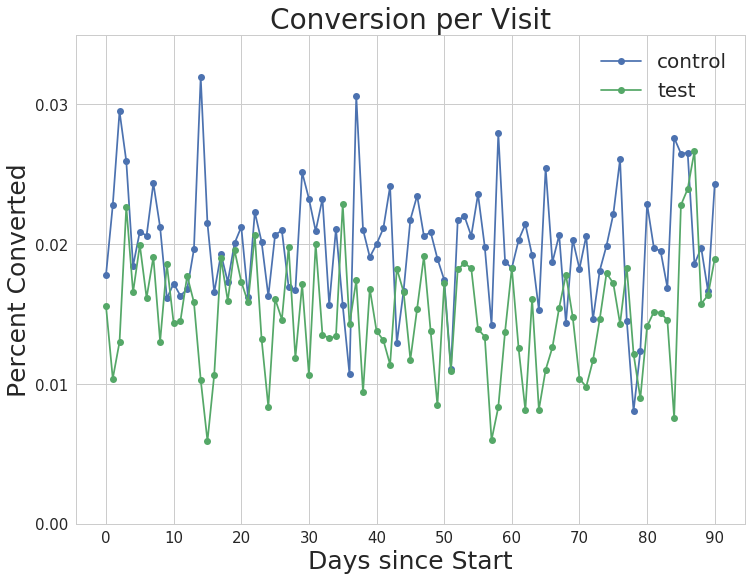

In [368]:
fig,ax=plt.subplots(figsize=(12,9));
# sns.pointplot(x='since_start',y='converted',hue='test',data=over_time);
# plt.scatter(x=over_time_control.since_start,y=over_time_control.converted,alpha = 0.7)
plt.plot(over_time_control.since_start,over_time_control.converted,'o-',label='control');
plt.plot(over_time_test.since_start,over_time_test.converted,'o-',label='test');
plt.xticks(np.arange(min(over_time.since_start),max(over_time.since_start)+1,10));
ax.set_xticklabels(np.arange(0,91,10));
plt.title('Conversion per Visit',fontsize=28);
plt.xlabel('Days since Start',fontsize=25);
plt.ylabel('Percent Converted',fontsize=25);
plt.ylim(0,0.035)
plt.yticks(np.arange(0,0.04,0.01));
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.legend(fontsize=20);

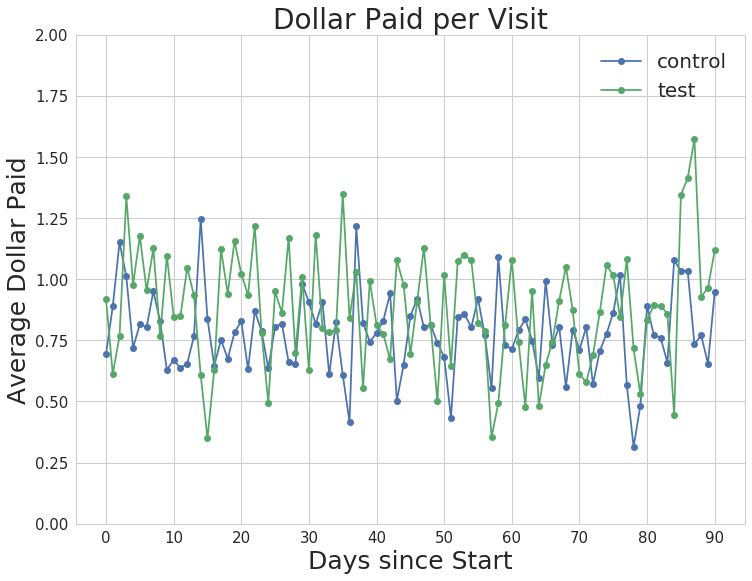

In [367]:
# fig,ax=plt.subplots(figsize=(10,8));
# sns.pointplot(x='since_start',y='paid',hue='test',data=over_time);
# plt.xticks(np.arange(min(over_time.since_start),max(over_time.since_start)+1,10));
# ax.set_xticklabels(np.arange(0,91,10));
# plt.title('Dollars spent per visit');
fig,ax=plt.subplots(figsize=(12,9));
# sns.pointplot(x='since_start',y='converted',hue='test',data=over_time);
# plt.scatter(x=over_time_control.since_start,y=over_time_control.converted,alpha = 0.7)
plt.plot(over_time_control.since_start,over_time_control.paid,'o-',label='control');
plt.plot(over_time_test.since_start,over_time_test.paid,'o-',label='test');
plt.xticks(np.arange(min(over_time.since_start),max(over_time.since_start)+1,10));
ax.set_xticklabels(np.arange(0,91,10));
plt.title('Dollar Paid per Visit',fontsize=28);
plt.xlabel('Days since Start',fontsize=25);
plt.ylabel('Average Dollar Paid',fontsize=25);
plt.ylim(0,2);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.legend(fontsize=20);

#### 1. From simple data visualization it looks the test group has lower conversion (not unexpected), but overall higher dollar paid per visit  
#### 2. The conversion and dollar paid in neither group seemed to be a strong function of time in days during the 3 month test period


In [236]:
df.head()

,source,device,operative_system,test,price,converted,city,country,lat,long,paid,time_in_day,month,day,since_start
0,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0,mid-night,5,8,67.0
1,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0,evening,5,10,69.0
2,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0,afternoon,4,4,33.0
3,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0,morning,5,7,66.0
4,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0,morning,5,24,83.0


### Look at some factors

In [397]:
def change_category(row):
    if row.test==0:
        out='control'
    else:
        out='test'
    return pd.Series(out)

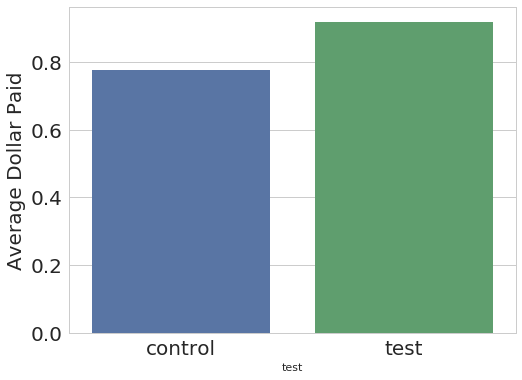

In [403]:
comp1=df.groupby('test').agg({'paid':np.mean}).reset_index()
comp1.test=comp1.apply(change_category,axis=1)
plt.figure(figsize=(8,6))
sns.barplot(x='test',y='paid',data=comp1);
plt.xticks(fontsize=20);
plt.ylabel('Average Dollar Paid',fontsize=20);
plt.yticks(fontsize=20);

In [245]:
np.sum(df[df.operative_system=='linux'].converted)

34

In [251]:
df.operative_system.value_counts()

windows    100976
iOS         95465
android     74935
mac         25085
other       16204
linux        4135
Name: operative_system, dtype: int64

####  The abnormaly in users using Linux may be a result of small sample size

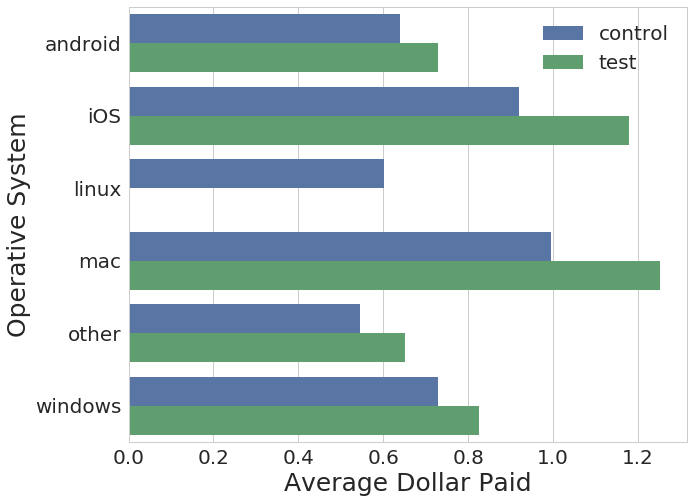

In [405]:
comp2=df.groupby(['operative_system','test']).agg({'paid':np.mean}).reset_index()
plt.figure(figsize=(10,8));
comp2.test=comp2.apply(change_category,axis=1)
sns.barplot(x='paid',y='operative_system',hue='test',data=comp2);
plt.xlabel('Average Dollar Paid',fontsize=25);
plt.ylabel('Operative System',fontsize=25);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);

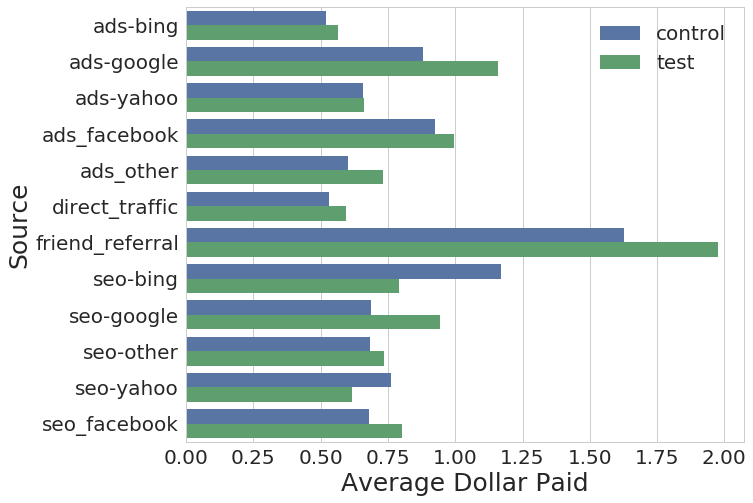

In [404]:
comp3=df.groupby(['source','test']).agg({'paid':np.mean}).reset_index()
plt.figure(figsize=(10,8));
comp3.test=comp3.apply(change_category,axis=1)
sns.barplot(x='paid',y='source',hue='test',data=comp3);
plt.xlabel('Average Dollar Paid',fontsize=25);
plt.ylabel('Source',fontsize=25);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);

#### A closer look at seo-bing

In [249]:
np.sum(df[df.source=='seo-bing'].converted)

51

In [250]:
df.source.value_counts()

direct_traffic     60357
ads-google         59379
ads_facebook       53396
ads_other          29876
seo-google         23175
ads-bing           22873
seo_facebook       21205
friend_referral    20695
seo-other           9260
ads-yahoo           7583
seo-yahoo           6848
seo-bing            2153
Name: source, dtype: int64

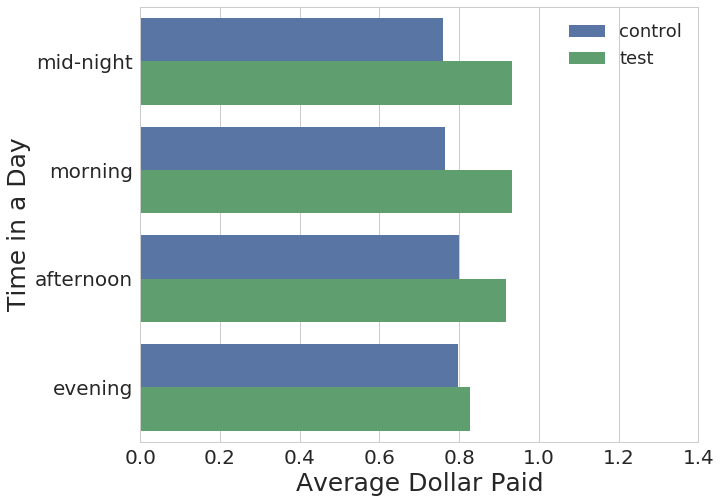

In [417]:
comp4=df.groupby(['time_in_day','test']).agg({'paid':np.mean}).reset_index()
plt.figure(figsize=(10,8));
comp4.test=comp4.apply(change_category,axis=1)
sns.barplot(x='paid',y='time_in_day',hue='test',data=comp4);
plt.xlabel('Average Dollar Paid',fontsize=25);
plt.ylabel('Time in a Day',fontsize=25);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=20);
plt.xlim(0,1.4)
plt.legend(loc='upper right',fontsize=18)

#### A simple t-test approach to try to answer how long is needed

#### Assuming each paid event is bernoulli trial, total spending on each day follows binomial distribution. Furthermore, as n is large, I assume average spending per day follows normal distribution.

In [276]:
df_by_day=df.groupby(['since_start','test']).agg({'paid':np.mean}).reset_index()

In [278]:
df_by_day.head()

,since_start,test,paid
0,0.0,0,0.694362
1,0.0,1,0.918685
2,1.0,0,0.889251
3,1.0,1,0.612457
4,2.0,0,1.150685


In [286]:
def compute_p_overtime(df):
    p_val_list=[]
    for i in np.arange(min(df.since_start)+1,max(df.since_start)+1,1):
        tmp_df=df[df.since_start<=i]
        tmp_control=tmp_df[tmp_df.test==0]
        tmp_test=tmp_df[tmp_df.test==1]
        p_val=ttest_ind(tmp_control.paid,tmp_test.paid,equal_var=False)[1]/2  # doing a one-sided t-test
        p_val_list.append(p_val)
    return p_val_list

In [288]:
p_list=compute_p_overtime(df_by_day)

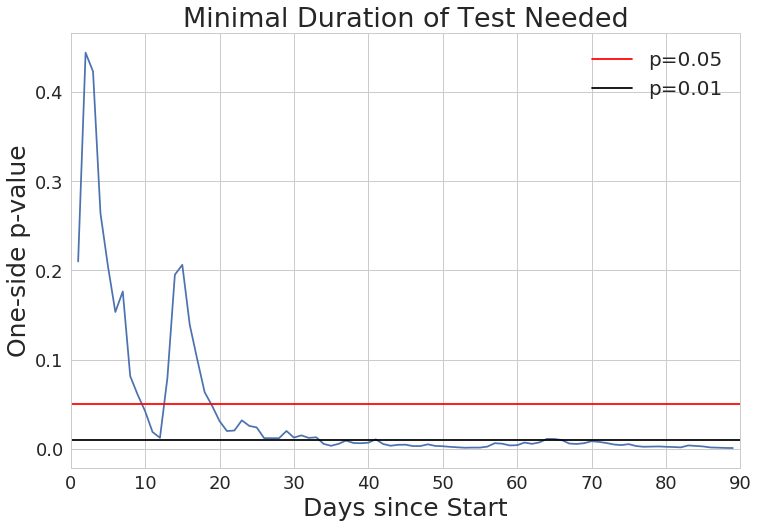

In [326]:
plt.figure(figsize=(12,8));
plt.plot(np.arange(1,90,1),p_list[1:90]);
x1,x2=0,90
y1,y2=0.05,0.05
plt.plot((x1,x2),(y1,y2),'r-',label='p=0.05');
y3,y4=0.01,0.01
plt.plot((x1,x2),(y3,y4),'k-',label='p=0.01');
plt.xlabel('Days since Start',fontsize=25);
plt.ylabel('One-side p-value',fontsize=25);
plt.title('Minimal Duration of Test Needed',fontsize=27);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlim(0,90);
plt.legend(fontsize=20);